<a href="https://colab.research.google.com/github/PerttiP/ML-Project-in-Automated-Software-Engineering/blob/main/PerttiTrainingModel2_KerasSeq_24features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
PerttiTrainingModel2_KerasSeq_24features
Google Colab version
----------------------------------------
IMPORTANT PRE-REQUISITE:
Please first prepare Pandas dataframe by running PerttiPrepareData24features.ipynb
which will create the input file PrepDataframe24features.csv
------------------------------------------------------------------------------
Test run options:
OPT1. Enable Data augmentation.
OPT2. Enable resampling with SMOTE.

Updates:
UPD1. With extended data feature "absolute code churn measure" : code_churn.
UPD2. With feature selection (Removed redundant data).
'''

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb # visualization
import matplotlib.pyplot as plot

THIS TEST IS RESAMPLING DATA TO AVOID IMBALANCED DATA!!!

This DNN Model is using SMOTE as a resampling technique.

Using Keras API with TensorFlow backend.

In [ ]:
# Install & Import imbalanced-learn library
!pip install -q scikit-learn imblearn

import imblearn
print(imblearn.__version__)

0.10.1


In [ ]:
# Mount my Google Drive into Colab
# from google.colab import drive
# FIXME: MessageError: Error: credential propagation was unsuccessful
# drive.mount('/content/drive')
'''
from pathlib import Path
current_work_directory = Path.cwd()
print("The current working directory is:", current_work_directory)
print(Path().absolute())
'''
# C:\Users\<USERID>\.keras

The current working directory is: /content
/content
%USERPROFILE%


In [ ]:
# Upload file to Colab
# https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

from google.colab import files
uploaded = files.upload()

Saving PrepDataframe24features.csv to PrepDataframe24features.csv


In [ ]:
# NOTE: Need to first upload pre-processed data file to Colab, See step 'Upload file to Colab' above!
# WARN: For unknown reason the uploaded file name sometimes get an extra id like (1)
import io
df = pd.read_csv(io.BytesIO(uploaded['PrepDataframe24features.csv']))
# df = pd.read_csv(io.BytesIO(uploaded['PrepDataframe.csv']))

# Works only for Anaconda:
# df = pd.read_csv('PrepDataframe.csv')

# Make sure we have values everywhere
print(df.isnull().sum().max())

# Make sure that column isbuggy is an integer!
df['isbuggy'] = df['isbuggy'].astype(int)
# print('------- df.dtypes:')
# print(df.dtypes)

0


In [ ]:
# OPT1. Data augmentation to increase the size of the dataset
# -----------------------------------------------------------
for i in range(1,5): # Range changed back to 1,5
   df = df._append(df) # append is deprecated in newer Pandas

In [ ]:
print(df.shape)

# Supervised Learning: include target (isbuggy) in training data
X = df
Y = df['isbuggy']
# print(Y)

# 2. Split into training data (70%) and test data (30%)
#    TODO: Split also into validation data?
trainSize = int(df.shape[0] * 0.70)

# ALTERNATIVE: Split using method from sklearn.model_selection
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

trainX = X.iloc[0: trainSize, :]
trainY = Y[0: trainSize]

testX = X.iloc[trainSize: , :]
testY = Y[trainSize: ]

print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(422128, 24)
(295489, 24) (295489,)
(126639, 24) (126639,)


In [ ]:
# OPT2. Oversampling of training data using SMOTE
# -----------------------------------------------

# Print class distribution counters, to see how imbalanced the dataset is
from collections import Counter
counter = Counter(trainY)
print('Distribution counters BEFORE SMOTE oversampling:')
print(counter)

from imblearn.over_sampling import SMOTE
trainXsmote, trainYsmote = SMOTE().fit_resample(trainX, trainY)

# Replace training data with oversampled data:
trainX = trainXsmote
trainY = trainYsmote

counter = Counter(trainYsmote)
print('Distribution counters AFTER SMOTE oversampling:')
print(counter)

Distribution counters BEFORE SMOTE oversampling:
Counter({0: 253468, 1: 42021})
Distribution counters AFTER SMOTE oversampling:
Counter({0: 253468, 1: 253468})


In [ ]:
# Data Transforms
# https://scikit-learn.org/stable/data_transforms.html

# Similar to the z-score method but involving simpler computation is the max-min method that
# computes the normalized feature value

# Normalization Step
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Perform fit only on training data!
trainX = scaler.fit_transform(trainX.values)
print(trainX)

# Apply same transformation to test data (but do not use fit)!
testX = scaler.transform(testX.values)
print(testX)

[[-0.0502896  -0.07904435 -0.07925173 ...  0.7341533  -1.
  -0.06927956]
 [-0.05079758 -0.09426927 -0.1490914  ...  0.60450515 -1.
  -0.07173552]
 [-0.04774971 -0.07904435 -0.07925173 ... -0.31807186 -1.
  -0.06878836]
 ...
 [-0.0502896  -0.09426927 -0.1490914  ... -0.33831159  1.
  -0.07075313]
 [-0.00914334 -0.09426927 -0.1490914  ... -0.12165888  1.
  -0.03219448]
 [-0.00711143  0.04275507  0.409626   ...  2.18242502  1.
  -0.02605457]]
[[-0.0431779  -0.07904435 -0.07925173 ...  2.22684645 -1.
  -0.06952515]
 [-0.0457178  -0.04859449  0.06042763 ...  1.90811978 -1.
  -0.05945569]
 [-0.017271   -0.06381942 -0.07925173 ...  0.03844862  1.
  -0.04373752]
 ...
 [-0.04774971 -0.06381942 -0.00941205 ...  2.39887256 -1.
  -0.06977075]
 [-0.0502896  -0.07904435 -0.1490914  ... -0.76434746 -1.
  -0.07075313]
 [-0.0502896  -0.07904435 -0.07925173 ... -0.57507719 -1.
  -0.07001635]]


trainX.shape[1:]:  (24,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               6400      
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 138241 (540.00 

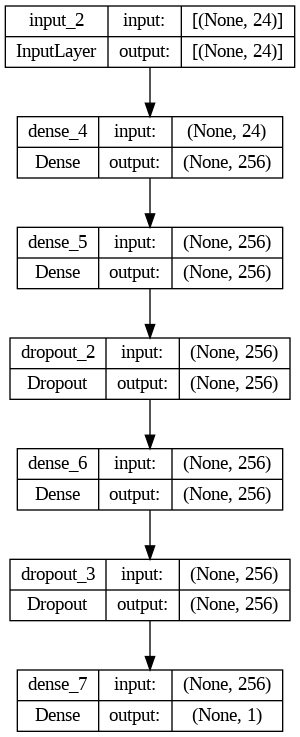

In [ ]:
# Import keras like this?:
# REF: https://machinelearningmastery.com/three-ways-to-build-machine-learning-models-in-keras/
from tensorflow import keras

# For Keras version 3 only? -> https://keras.io/guides/migrating_to_keras_3/
# Or import keras like this, configuring the backend?:
# REF: https://keras.io/getting_started/
'''
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
'''

# To keep using Keras version 2? -> https://blog.tensorflow.org/2024/03/whats-new-in-tensorflow-216.html
# os.environ['TF_USE_LEGACY_KERAS'] = '1'

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

# How many features do we have?
print('trainX.shape[1:]: ', trainX.shape[1:])

# ATTEMPT TWO using Keras version 2 or 3
# Build a binary classification model
# REF: https://keras.io/examples/structured_data/imbalanced_classification/
model = keras.Sequential(
    [
        keras.Input(shape=trainX.shape[1:]),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

print (model.summary())

keras.utils.plot_model(model, "my_keras_seq_model.png", show_shapes=True)

In [ ]:
# Check that h5py is installed and works, https://docs.h5py.org/en/latest/build.html
# The h5py package is used to load data from the HDF5. This is already installed in Colab.
# For other environments you may need to use conda or pip to install h5py.
import h5py
# h5py.run_tests() # OK ON COLAB

In [ ]:
# Set up Evaluation metrics
# https://keras.io/api/metrics/
metrics = [
    keras.metrics.Accuracy(name="accuracy"),
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

# Set up Early Stopping callback
# Will stop the training when there is no improvement in the loss for three consecutive epochs
# https://keras.io/api/callbacks/early_stopping/
early_stop = keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=3,
    verbose=1)

# Set up Model Checkpoint callback
# Will save the Keras model or model weights at some frequency
# https://keras.io/api/callbacks/model_checkpoint/
checkpoint_filepath = 'checkpoint.weights.h5'
checkpoint = keras.callbacks.ModelCheckpoint(
    # filepath = "{epoch:02d}-{val_loss:.2f}.keras",
    filepath = checkpoint_filepath,
    save_weights_only=True,
    # monitor="val_loss",
    # mode="min", # For val_loss this should be "min"
    monitor="val_accuracy",
    mode="max", # For val_accuracy this should be "max"
    save_best_only=True,
    verbose=1)

# Train the model
model.compile(optimizer=keras.optimizers.Adam(1e-2), loss="mean_squared_error", metrics=metrics)

history = model.fit(
    trainX,
    trainY,
    batch_size=30,
    #epochs=150, # Takes several hours...
    epochs=50,
    verbose=1,
    callbacks=[early_stop, checkpoint],
    validation_data=(testX, testY))

# Load the model weights (that are considered the best)
model.load_weights(checkpoint_filepath)

# Print contents of .h5 file
'''
print('---------- Contents of .h5 file: ')
with h5py.File(checkpoint_filepath, 'r') as hdfid:
     mylist = list(hdfid.keys())
     for var in mylist:
         obj = hdfid[var]
         #if isinstance(obj, h5py.Dataset):
         print(obj.name, obj.parent)
'''
# Make prediction of target Y using test data in X
predictedY = model.predict(testX)
print('---------- predictedY: ')
print(predictedY)

Epoch 1/50
16895/16898 [============================>.] - ETA: 0s - loss: 0.0660 - accuracy: 0.9320 - fn: 14568.0000 - fp: 18902.0000 - tn: 234528.0000 - tp: 238852.0000 - precision: 0.9267 - recall: 0.9425
Epoch 1: val_accuracy improved from -inf to 0.98313, saving model to checkpoint.weights.h5
16898/16898 [==============================] - 164s 10ms/step - loss: 0.0660 - accuracy: 0.9320 - fn: 14568.0000 - fp: 18905.0000 - tn: 234563.0000 - tp: 238900.0000 - precision: 0.9267 - recall: 0.9425 - val_loss: 0.0168 - val_accuracy: 0.9831 - val_fn: 103.0000 - val_fp: 2029.0000 - val_tn: 106759.0000 - val_tp: 17748.0000 - val_precision: 0.8974 - val_recall: 0.9942
Epoch 2/50
16896/16898 [============================>.] - ETA: 0s - loss: 0.0749 - accuracy: 0.9251 - fn: 27892.0000 - fp: 10072.0000 - tn: 243365.0000 - tp: 225551.0000 - precision: 0.9573 - recall: 0.8899
Epoch 2: val_accuracy did not improve from 0.98313
16898/16898 [==============================] - 140s 8ms/step - loss: 0.0

3961/3961 [==============================] - 19s 5ms/step - loss: 0.0059 - accuracy: 0.9941 - fn: 2320.0000 - fp: 673.0000 - tn: 252795.0000 - tp: 251148.0000 - precision: 0.9973 - recall: 0.9908
---------- train_eval_metrics: 
[0.005904098507016897, 0.9940959215164185, 2320.0, 673.0, 252795.0, 251148.0, 0.997327446937561, 0.9908469915390015]
Train loss: 
0.005904098507016897
Train accuracy: 
0.9940959215164185
precision: 0.983147 , recall: 0.990197
3958/3958 [==============================] - 29s 7ms/step - loss: 0.0038 - accuracy: 0.9962 - fn: 175.0000 - fp: 303.0000 - tn: 108485.0000 - tp: 17676.0000 - precision: 0.9831 - recall: 0.9902
---------- test_eval_metrics: 
[0.0037745086010545492, 0.9962254762649536, 175.0, 303.0, 108485.0, 17676.0, 0.9831470251083374, 0.9901966452598572]
Test loss: 
0.0037745086010545492
Test accuracy: 
0.9962254762649536


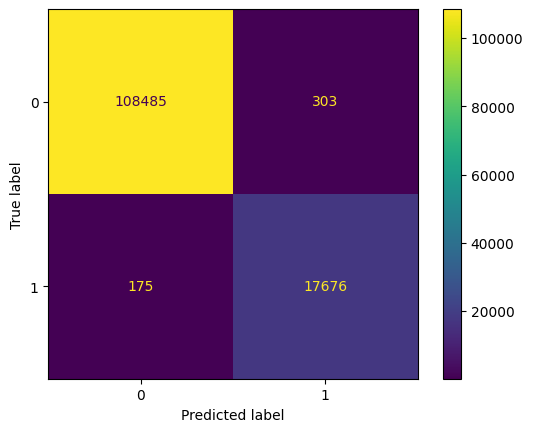

In [ ]:
# Evaluate model (using training data)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(testY, predictedY)
ConfusionMatrixDisplay(cm).plot()

train_eval_metrics = model.evaluate(trainX, trainY, batch_size=128)
print('---------- train_eval_metrics: ')
print(train_eval_metrics)

train_loss = train_eval_metrics[0]
train_accuracy = train_eval_metrics[1]

print('Train loss: ')
print(train_loss)
print('Train accuracy: ')
print(train_accuracy)

# Precision and Recall
from sklearn.metrics import precision_score, recall_score
# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
ps = precision_score(testY, predictedY)
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
rs = recall_score(testY, predictedY)
print('precision: %f , recall: %f' % (ps, rs))

# Evaluate model (using test data)
test_eval_metrics = model.evaluate(testX, testY)  # TODO: Should we split into separate validation data?
print('---------- test_eval_metrics: ')
print(test_eval_metrics)

test_loss = test_eval_metrics[0]
test_accuracy = test_eval_metrics[1]

print('Test loss: ')
print(test_loss)
print('Test accuracy: ')
print(test_accuracy)